## COVID STATS WEB SCRAPING and ANALYSIS FOR ALL WORLD COUNTRIES
## SCRIPT is 100% in working state as of 4/30/2020

In [1]:
import pandas as pd
#import geopandas as gpd
import requests
from bs4 import BeautifulSoup
import re
from datetime import date
import pyodbc
from datetime import datetime

### Scraping new Data from www.worldometers.info

In [2]:
r = requests.get("https://www.worldometers.info/coronavirus/", headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
c = r.content
soup=BeautifulSoup(c,"html.parser")
#print(soup.prettify)
x1 = soup.title.string
s = ''.join(x for x in x1 if x.isdigit())
today = date.today()


### Listing all the cases reported and Deaths occured till today

In [3]:
cases = s[0:6]
print('Cases Reported: as of ',today,' is ',cases)
deaths = s[7:13]
print('Deaths Reported: as of ',today,' is ',deaths)
table = soup.find('table')
table_rows = table.find_all('tr')
List = [] 

Cases Reported: as of  2020-05-04  is  356700
Deaths Reported: as of  2020-05-04  is  248313


### Loooping to find the state Wise Division of cases & Arranging the data in the columnar format


In [4]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    List.append(row)
df = pd.DataFrame(List) 
df = df[1:202]
df.columns = ['Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered','Active_Cases','Serious_Cases', 'Total_Cases/1M_pop', 'Deaths/1M_pop', 'Total_Tests','Tests/1M_pop','Continent']


### Cleaning the data

In [5]:
def remove(string): 
    return string.replace(" ", "")

df['New_Cases'] = df['New_Cases'].str.replace('+', '')
df['New_Cases'] = df['New_Cases'].str.replace(',','')
remove(df['New_Cases'])

df['New_Deaths'] = df['New_Deaths'].str.replace('+', '')
df['New_Deaths'] = df['New_Deaths'].str.replace(',', '')
df['New_Deaths'] = df['New_Deaths'].str.strip()
remove(df['New_Deaths'])

df['Total_Cases'] = df['Total_Cases'].str.replace(',', '')
df['Total_Cases'] = df['Total_Cases'].str.replace('+', '')
remove(df['Total_Cases'])

df['Total_Deaths'] = df['Total_Deaths'].str.replace(',', '')
df['Total_Deaths'] = df['Total_Deaths'].str.replace('+', '')
df['Total_Deaths'] = df['Total_Deaths'].str.strip()
remove(df['Total_Deaths'])

df['Active_Cases'] = df['Active_Cases'].str.replace(',', '')
df['Active_Cases'] = df['Active_Cases'].str.replace('+', '')
remove(df['Active_Cases'] )

df['Total_Recovered'] = df['Total_Recovered'].str.replace(',', '')
df['Total_Recovered'] = df['Total_Recovered'].str.replace('+', '')
df['Total_Recovered'] = df['Total_Recovered'].str.replace('N/A', '')
remove(df['Total_Recovered'] )

df['Serious_Cases'] = df['Serious_Cases'].str.replace(',', '')
df['Serious_Cases'] = df['Serious_Cases'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].str.replace(',', '')
df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Total_Tests'] = df['Total_Tests'].str.replace(',', '')
df['Total_Tests'] = df['Total_Tests'].str.replace('+', '')
remove(df['Serious_Cases'] )

df['Tests/1M_pop'] = df['Tests/1M_pop'].str.replace(',', '')
df['Tests/1M_pop'] = df['Tests/1M_pop'].str.replace('+', '')
remove(df['Tests/1M_pop'] )

df.fillna(0)
#df.replace('',0)

df


,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
1,\nNorth America\n,1293006,1925,75265,111,221520,996221,17392,,,,,North America
2,\nEurope\n,1447554,51,140616,13,542810,764128,17272,,,,,Europe
3,\nAsia\n,559198,396,19628,11,295683,243887,5363,,,,,Asia
4,\nSouth America\n,212641,829,10871,31,73992,127778,9858,,,,,South America
5,\nOceania\n,8411,21,115,,7213,1083,31,,,,,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Dominica,16,,,,13,3,,222,,383,5320,North America
198,Namibia,16,,,,8,8,,6,,1122,442,Africa
199,St. Vincent Grenadines,16,,,,8,8,,144,,108,973,North America
200,Nicaragua,15,1,5,2,7,3,,2,0.8,,,North America


### Converting to Integer Format Replacing Blanks with 0's

In [6]:
def convert_fill(df):
    return df.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

df  = convert_fill(df)

df['Total_Cases'] = df['Total_Cases'].astype(int)

df['Total_Deaths'] = df['Total_Deaths'].astype(int)

df['New_Cases'] = df['New_Cases'].astype(int)

df['Active_Cases'] = df['Active_Cases'].astype(int)

df['Total_Recovered'] = df['Total_Recovered'].astype(int)

df['New_Deaths'] = df['New_Deaths'].astype(int)

df['Serious_Cases'] = df['Serious_Cases'].astype(int)

#df['Total_Cases/1M_pop'] = df['Total_Cases/1M_pop'].astype(int)

#df['Deaths/1M_pop'] = df['Deaths/1M_pop'].astype(int)

df['Total_Tests'] = df['Total_Tests'].astype(int)


df

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
1,\nNorth America\n,1293006,1925,75265,111,221520,996221,17392,0,0,0,0,North America
2,\nEurope\n,1447554,51,140616,13,542810,764128,17272,0,0,0,0,Europe
3,\nAsia\n,559198,396,19628,11,295683,243887,5363,0,0,0,0,Asia
4,\nSouth America\n,212641,829,10871,31,73992,127778,9858,0,0,0,0,South America
5,\nOceania\n,8411,21,115,0,7213,1083,31,0,0,0,0,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Dominica,16,0,0,0,13,3,0,222,0,383,5320,North America
198,Namibia,16,0,0,0,8,8,0,6,0,1122,442,Africa
199,St. Vincent Grenadines,16,0,0,0,8,8,0,144,0,108,973,North America
200,Nicaragua,15,1,5,2,7,3,0,2,0.8,0,0,North America


### Seperating Countries and Continent Data

In [7]:
df_country = df[7:]

df_continent = df[0:7]
df_continent['Country'] = df_continent['Country'].str.strip()

C:\Users\jaysh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Plotting Bar Graphs and TreeMap

In [8]:
dfplot = df_country.head(10)

In [9]:
dfplot = dfplot[1:7]

In [10]:
Total_Cases = dfplot['Total_Cases'].values.tolist()
Total_Deaths = dfplot['Total_Deaths'].values.tolist()
Active_Cases = dfplot['Active_Cases'].values.tolist()
Total_Tests = dfplot['Total_Tests'].values.tolist()

State = dfplot['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Cases': Total_Cases,
                      'Active_Cases': Active_Cases,
                      'Total_Deaths': Total_Deaths}, 
                       index = index)

ax = dfplot1.plot.bar(rot=0)

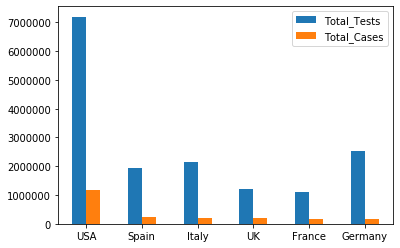

In [11]:
Total_Cases = dfplot['Total_Cases'].values.tolist()
Total_Deaths = dfplot['Total_Deaths'].values.tolist()
Active_Cases = dfplot['Active_Cases'].values.tolist()
Total_Tests = dfplot['Total_Tests'].values.tolist()

State = dfplot['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Tests': Total_Tests,
                      'Total_Cases': Total_Cases}, 
                       index = index)

ax = dfplot1.plot.bar(rot=0)

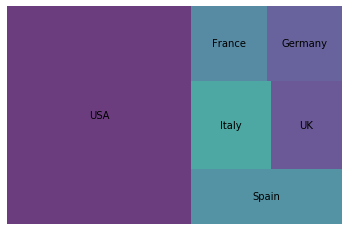

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
my_values=[i**3 for i in range(1,1000)]
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# If you have 2 lists
# squarify.plot(sizes=Total_Cases, label=State, alpha=.7, color = colors)
# plt.axis('off')
# plt.show()

squarify.plot(sizes=Total_Cases, label=State, alpha=.8 )
plt.axis('off')
plt.show()

### Connecting to SQL SERVER to store data in relational format

In [13]:
#Define the server name and the database name
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')


cursor = cnxn.cursor()

### Inserting Country DATA to the SQL SERVER


In [14]:
for index,row in df_country.iterrows():
    cursor.execute("""INSERT INTO Country_Records ([Country],
                   [Total_Cases],[New_Cases],[Total_Deaths],[New_Deaths],[Active_Cases],
                   [Total_Tests],[Serious_Cases],[Total_Recovered],[Continent], [Date])
     VALUES (?,?,?,?,?,?,?,?,?,?,?)""", 
                            row['Country'], 
                            row['Total_Cases'], 
                            row['New_Cases'],
                            row['Total_Deaths'],
                            row['New_Deaths'],
                            row['Active_Cases'],
                            row['Total_Tests'],
                            row['Serious_Cases'],
                            row['Total_Recovered'],
                            row['Continent'],
                            datetime.now()) 
cnxn.commit()
cursor.close()
cnxn.close()

In [15]:
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')
cursor = cnxn.cursor()

SQL_Query = pd.read_sql_query('''SELECT * FROM [Country_Records]''', cnxn)

cursor.close()

In [16]:
SQL_Query

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases,Total_Tests,Serious_Cases,Total_Recovered,Continent,Date
0,World,3232061,13877,228504,474,1995692,0,59772,1007865,All,2020-04-30 05:18:31.813
1,USA,1064572,378,61669,13,855492,6139911,18671,147411,North America,2020-04-30 05:18:31.817
2,Spain,236899,0,24275,0,79695,1414477,7764,132929,Europe,2020-04-30 05:18:31.820
3,Italy,203591,0,27682,0,104657,1910761,1795,71252,Europe,2020-04-30 05:18:31.820
4,France,166420,0,24087,0,94105,463662,4207,48228,Europe,2020-04-30 05:18:31.823
...,...,...,...,...,...,...,...,...,...,...,...
383,Dominica,16,0,0,0,3,383,0,13,North America,2020-05-04 03:06:25.840
384,Namibia,16,0,0,0,8,1122,0,8,Africa,2020-05-04 03:06:25.840
385,St. Vincent Grenadines,16,0,0,0,8,108,0,8,North America,2020-05-04 03:06:25.840
386,Nicaragua,15,1,5,2,3,0,0,7,North America,2020-05-04 03:06:25.840


In [17]:
#Define the server name and the database name
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')


cursor = cnxn.cursor()

### Inserting Continent DATA to the SQL SERVER

In [18]:
for index,row in df_continent.iterrows():
    cursor.execute("""INSERT INTO Continent_Records ([Country],
                   [Total_Cases],[New_Cases],[Total_Deaths],[New_Deaths],[Active_Cases],
                   [Total_Tests],[Serious_Cases],[Total_Recovered],[Continent], [Date])
     VALUES (?,?,?,?,?,?,?,?,?,?,?)""", 
                            row['Country'], 
                            row['Total_Cases'], 
                            row['New_Cases'],
                            row['Total_Deaths'],
                            row['New_Deaths'],
                            row['Active_Cases'],
                            row['Total_Tests'],
                            row['Serious_Cases'],
                            row['Total_Recovered'],
                            row['Continent'],
                            datetime.now()) 
cnxn.commit()
cursor.close()
cnxn.close()

In [19]:
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')
cursor = cnxn.cursor()

SQL_Query2 = pd.read_sql_query('''SELECT * FROM [Continent_Records]''', cnxn)

cursor.close()

In [20]:
SQL_Query2

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases,Total_Tests,Serious_Cases,Total_Recovered,Continent,Date
0,North America,1152608,1682,67130,183,902709,0,19940,182769,North America,2020-04-30 05:18:32.037
1,Europe,1356135,8755,133176,229,732861,0,24139,490098,Europe,2020-04-30 05:18:32.037
2,Asia,510086,2758,18330,53,234372,0,5778,257384,Asia,2020-04-30 05:18:32.040
3,South America,166468,654,8150,6,101020,0,9748,57298,South America,2020-04-30 05:18:32.040
4,Oceania,8330,8,110,2,1185,0,41,7035,Australia/Oceania,2020-04-30 05:18:32.040
5,Africa,37713,20,1593,1,23484,0,122,12636,Africa,2020-04-30 05:18:32.040
6,,721,0,15,0,61,0,4,645,0,2020-04-30 05:18:32.043
7,North America,1293006,1925,75265,111,996221,0,17392,221520,North America,2020-05-04 03:06:26.040
8,Europe,1447554,51,140616,13,764128,0,17272,542810,Europe,2020-05-04 03:06:26.043
9,Asia,559198,396,19628,11,243887,0,5363,295683,Asia,2020-05-04 03:06:26.043


### Continent based Graphs

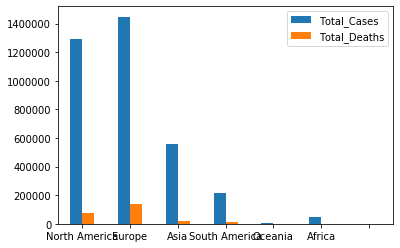

In [21]:
Total_Cases = df_continent['Total_Cases'].values.tolist()
Total_Deaths = df_continent['Total_Deaths'].values.tolist()
Active_Cases = df_continent['Active_Cases'].values.tolist()
Total_Tests = df_continent['Total_Tests'].values.tolist()

State = df_continent['Country'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Cases': Total_Cases,
                      'Total_Deaths': Total_Deaths}, 
                       index = index,
                      )

ax = dfplot1.plot.bar(rot=0)

In [22]:
df_country.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Cases,Total_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Continent
8,World,3567005,3316,248313,167,1157018,2161674,50052,458,31.9,0,0,All
9,USA,1188421,299,68602,4,178594,941225,16139,3590,207,7196740,21742,North America
10,Spain,247122,0,25264,0,148558,73300,2386,5285,540,1932455,41332,Europe
11,Italy,210717,0,28884,0,81654,100179,1501,3485,478,2153772,35622,Europe
12,UK,186599,0,28446,0,0,157809,1559,2749,419,1206405,17771,Europe


# THE END 